In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import graphviz
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, accuracy_score
pd.set_option("display.max_columns", 100)
%matplotlib inline

In [78]:
from src.data import *
from sklearn import tree

In [108]:
from sklearn.metrics import roc_curve, auc

def plotroc(TPR, FPR):
    roc_auc = auc(TPR, FPR)
    plt.figure(figsize=(7,7))
    lw = 2
    plt.plot(TPR, FPR, color='darkorange',
             lw=lw, label="ROC curve area = {0:0.4f}".format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [79]:
## data set up as X_train, y_train, X_test, y_test

df = pd.read_csv('data/churn_train.csv')

dftest = pd.read_csv('data/churn_test.csv')

X_train, y_train = get_data(df)

X_test, y_test = get_data(dftest)

xcolnames = X_train.columns

X_train = np.array(X_train)

y_train = np.array(y_train)

## Descision Tree Classifier

In [81]:
dtc = tree.DecisionTreeClassifier(max_depth=3,)
dtc.fit(X_train, y_train);

y_preds_dtc = dtc.predict_proba(X_test)[:,1]
y_preds_dtc_bin = dtc.predict(X_test)

TPRdtc, FPRdtc, thresholdsdtc = roc_curve(y_test, y_preds_dtc, pos_label=None, sample_weight=None, drop_intermediate=True)

plotroc(TPRdtc, FPRdtc)

dtc_prec = np.mean(cross_val_score(dtc, X_train, y_train, scoring='precision', cv=5))
dtc_acc = np.mean(cross_val_score(dtc, X_train, y_train, scoring='accuracy', cv=5))
dtc_test_prec = precision_score(y_test, y_preds_dtc_bin)
dtc_test_acc = accuracy_score(y_test, y_preds_dtc_bin)
print("The cross validated precision score is {:0.3}".format(dtc_prec))
print("The cross validated accuracy score is {:0.3}".format(dtc_acc))
print("The test precision score is {:0.3}".format(dtc_test_prec))
print("The test accuracy score is {:0.3}".format(dtc_test_acc))

In [182]:
graph.export_graphviz('tree.png')

AttributeError: 'Source' object has no attribute 'export_graphviz'

In [188]:
tree_data.dot -o 'tree.png'

SyntaxError: invalid syntax (<ipython-input-188-296014e90fa1>, line 1)

In [185]:
import graphviz
tree_data = tree.export_graphviz(dtc, out_file="tree.png",
                         feature_names=xcolnames,  
                         class_names=['churn', 'not churn'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(tree_data)  
graph

Error: <stdin>: syntax error in line 1 near 'None'


CalledProcessError: Command '['dot', '-Tsvg']' returned non-zero exit status 1.

## Bagging Classifier

In [89]:
from sklearn.ensemble import BaggingClassifier

bagc = BaggingClassifier(n_estimators=100)
bagc.fit(X_train, y_train);

y_preds_bagc = bagc.predict_proba(X_test)[:,1]
y_preds_bagc_bin = bagc.predict(X_test)

TPRbagc, FPRbagc, thresholdsbagc = roc_curve(y_test, y_preds_bagc, pos_label=None, sample_weight=None, drop_intermediate=True)

plotroc(TPRbagc, FPRbagc)

bagc_prec = np.mean(cross_val_score(bagc, X_train, y_train, scoring='precision', cv=5))
bagc_acc = np.mean(cross_val_score(bagc, X_train, y_train, scoring='accuracy', cv=5))
bagc_test_prec = precision_score(y_test, y_preds_bagc_bin)
bagc_test_acc = accuracy_score(y_test, y_preds_bagc_bin)
print("The cross validated precision score is {:0.3}".format(bagc_prec))
print("The cross validated accuracy score is {:0.3}".format(bagc_acc))
print("The test precision score is {:0.3}".format(bagc_test_prec))
print("The test accuracy score is {:0.3}".format(bagc_test_acc))

## Random Forest

In [103]:
from sklearn.model_selection import GridSearchCV
random_forest_grid = {'max_depth': [3, None],
                      'max_features': ['sqrt', 'log2', None],
                      'min_samples_split': [2, 4],
                      'min_samples_leaf': [1, 2, 4],
                      'bootstrap': [True, False],
                      'n_estimators': [20, 40, 60, 80, 100, 120],
                      'random_state': [22]}
rf_gridsearch = GridSearchCV(RandomForestClassifier(),
                      random_forest_grid,
                      n_jobs=-1,verbose=True,
                      scoring='precision')
rf_gridsearch.fit(X_train, y_train)
print("best parameters:", rf_gridsearch.best_params_)

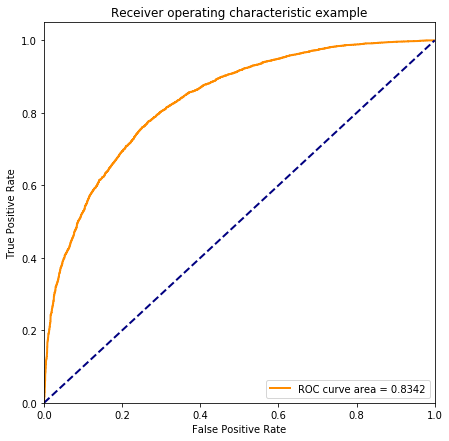

The cross validated precision score is 0.797
The cross validated accuracy score is 0.779
The test precision score is 0.789
The test accuracy score is 0.769


In [117]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=120, min_samples_leaf=4)
rfc.fit(X_train, y_train);

y_preds_rfc = rfc.predict_proba(X_test)[:,1]
y_preds_rfc_bin = rfc.predict(X_test)

TPRrfc, FPRrfc, thresholdsrfc = roc_curve(y_test, y_preds_rfc, pos_label=None, sample_weight=None, drop_intermediate=True)

plotroc(TPRrfc, FPRrfc)

rfc_prec = np.mean(cross_val_score(rfc, X_train, y_train, scoring='precision', cv=5))
rfc_acc = np.mean(cross_val_score(rfc, X_train, y_train, scoring='accuracy', cv=5))
rfc_test_prec = precision_score(y_test, y_preds_rfc_bin)
rfc_test_acc = accuracy_score(y_test, y_preds_rfc_bin)
print("The cross validated precision score is {:0.3}".format(rfc_prec))
print("The cross validated accuracy score is {:0.3}".format(rfc_acc))
print("The test precision score is {:0.3}".format(rfc_test_prec))
print("The test accuracy score is {:0.3}".format(rfc_test_acc))

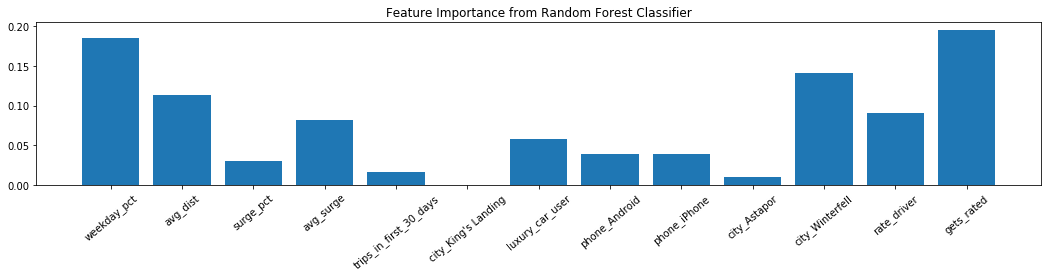

In [172]:
## Feature Importance from Random Forest Viz

fi = rfc.feature_importances_
newfi = fi[sort]
sort = fi.argsort()[::-1]
newname = xcolnames[sort]
newfi = fi[sort]



fig = plt.figure(figsize=(18,3))
ax1.set_label
ax1 = fig.add_subplot(111)
ax1.set_title('Feature Importance from Random Forest Classifier')
ax1.bar(x=newname, height=newfi)
ax1.set_xticklabels(newname, rotation=40);

In [173]:
newfi

array([ 0.19466851,  0.18494671,  0.14043189,  0.11286912,  0.09011669,
        0.08238583,  0.05814463,  0.03942691,  0.03870531,  0.03082027,
        0.01647464,  0.01071284,  0.00029665])

<Container object of 13 artists>

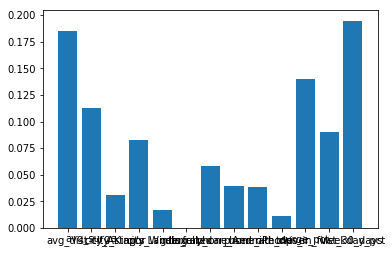

In [180]:
plt.bar(x=newname, height=newfi, )

## KNN Classifier

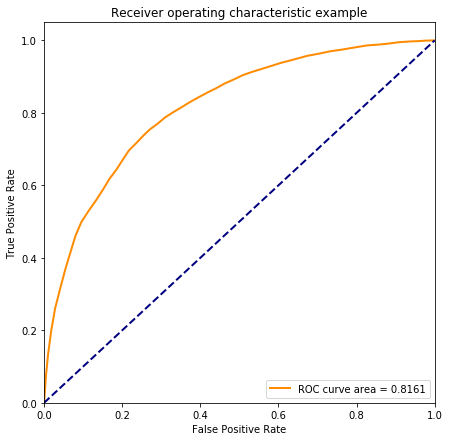

The cross validated precision score is 0.784
The cross validated accuracy score is 0.755
The test precision score is 0.786
The test accuracy score is 0.753


In [132]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)

scal = StandardScaler()
X_train_scal = scal.fit_transform(X_train)
X_test_scal = scal.transform(X_test)

knn.fit(X_train_scal, y_train);

y_preds_knn = knn.predict_proba(X_test_scal)[:,1]
y_preds_knn_bin = knn.predict(X_test_scal)

TPRknn, FPRknn, thresholdsknn = roc_curve(y_test, y_preds_knn, pos_label=None, sample_weight=None, drop_intermediate=True)

plotroc(TPRknn, FPRknn)

knn_prec = np.mean(cross_val_score(knn, X_train, y_train, scoring='precision', cv=5))
knn_acc = np.mean(cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=5))
knn_test_prec = precision_score(y_test, y_preds_knn_bin)
knn_test_acc = accuracy_score(y_test, y_preds_knn_bin)
print("The cross validated precision score is {:0.3}".format(knn_prec))
print("The cross validated accuracy score is {:0.3}".format(knn_acc))
print("The test precision score is {:0.3}".format(knn_test_prec))
print("The test accuracy score is {:0.3}".format(knn_test_acc))

In [ ]:
if __name__ == '__main__':